In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 替换为您的实际Excel文件路径
file_path = "./data/充放电导出数据.xlsx"

# 创建一个空字典来储存所有工作表的D列和E列数据
sheets_data = {}

cycle_num = 0

# 使用pandas读取Excel文件
with pd.ExcelFile(file_path) as xls:
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet_name)
        columns_data = df.iloc[0:, [3]]
        sheets_data[sheet_name] = columns_data


for key in sheets_data:
    df = sheets_data[key]
    col = df["放电容量(Ah)"]
    
    result = []
    for cell in col:
        result.append(cell)
    sheets_data[key] = result
    
    print(f'key: {key}, cnt: {len(result)}')


key: PANA2.5A, cnt: 440
key: PANA3.0A, cnt: 200
key: SANYO2.5A, cnt: 450
key: SANYO3.0A, cnt: 480


In [40]:
for key in sheets_data:
    _ = []
    initial_capacity = sheets_data[key][0]
    cnt = 0
    for e in sheets_data[key]:
        if e / initial_capacity < 0.8:
            cnt += 1
            _.append(e)
            if cnt > 3:
                break
        else:
            cnt = 0
            _.append(e)
    sheets_data[key] = _
    print(f'key: {key}, initial_capacity: {initial_capacity}, cnt: {len(_)}')

key: PANA2.5A, initial_capacity: 2.9806, cnt: 109
key: PANA3.0A, initial_capacity: 2.8413, cnt: 40
key: SANYO2.5A, initial_capacity: 3.1898, cnt: 130
key: SANYO3.0A, initial_capacity: 3.1097, cnt: 50


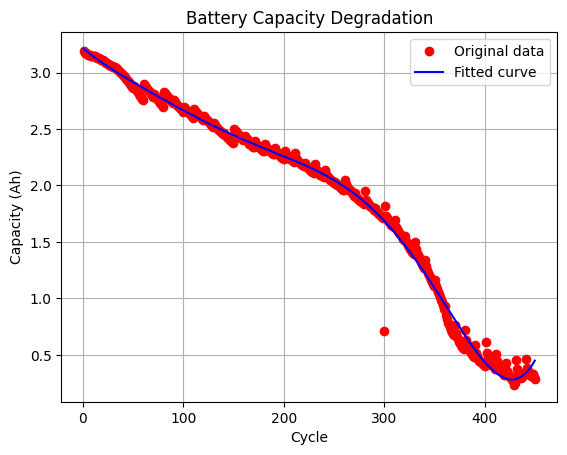

450
[ 9.04413164e-15 -9.37676765e-12  3.41382147e-09 -5.69740984e-07
  5.18113811e-05 -7.56325570e-03  3.21714523e+00]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

plt.style.use('default') # 或使用其他样式，例如 'ggplot', 'seaborn-dark' 等

# 假设的充放电次数(cycle)和对应的电池容量(capacity)数据
# capacity = sheets_data['PANA2.5A']
# capacity = sheets_data['PANA3.0A']
capacity = sheets_data['SANYO2.5A']
# capacity = sheets_data['SANYO3.0A']
cycle = np.arange(1, len(capacity)+1)

# 使用三阶多项式拟合
coef = np.polyfit(cycle, capacity, 6)
poly = Polynomial(coef[::-1])  # np.polyfit的系数是从高次到低次，Polynomial需要从低次到高次

# 生成用于绘图的数据
x_fit = np.linspace(cycle[0], cycle[-1], num=500)
y_fit = poly(x_fit)

# 绘制原始数据点和拟合曲线
plt.figure()
plt.plot(cycle, capacity, 'ro', label='Original data')
plt.plot(x_fit, y_fit, 'b-', label='Fitted curve')
plt.title('Battery Capacity Degradation')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.legend()
plt.grid(True)
plt.show()

# 输出多项式系数
print(len(cycle))
print(coef)


现在我截取一段数据（长度称之为最小长度l0）进行训练，拟合出一个多项式形式的回归函数，并通过该函数估计RUL。

然后增加10个数据，重新训练，重新估计RUL。

重复上述过程，直到数据集的长度达到最大长度l。

该过程中，RUL的标签值是已知的，因此可以通过计算预测值与标签值的差值，来评估模型的性能。

In [ ]:
l0 = 50